In [3]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

# Data
url = "https://raw.githubusercontent.com/PokeBowen/FordProject/main/ford.csv"
df = pd.read_csv(url)
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


Harry: Among the used cars that were sold, what attributes did they have in common? Are there any specific attributes that people look for when purchasing used cars?
The used car market is very different from, but also as big as the new car market. Many people that buy used cars do not look for the same things as the people that buy new cars. Whether it is the price, mileage, or other attributes, we want to see which attributes make a car more appealing in the used car market. 
We can categorize the cars based on mileage into new and used cars. And from there we can see the frequencies of the attribute to determine the trend


In [4]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [5]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [6]:
max(df["year"])

2060

In [7]:
df = df[(df["year"] != 2060)]
max(df["year"])

2020

In [8]:
new_cars = df[df["mileage"] <= 500]
new_cars.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
35,Mondeo,2019,20000,Manual,24,Diesel,145,65.7,2.0
43,Fiesta,2019,13140,Manual,7,Petrol,145,48.7,1.1
52,Ka+,2019,8495,Manual,32,Petrol,145,48.7,1.2
246,EcoSport,2020,17998,Manual,250,Petrol,145,51.4,1.0
509,Tourneo Custom,2019,29999,Manual,100,Diesel,145,30.1,2.0


In [9]:
used_cars = df[df["mileage"] > 500]
used_cars.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [10]:
#Top 5 Most popular Used Cars
used_cars["model"].value_counts()[0:5]

 Fiesta      6447
 Focus       4535
 Kuga        2205
 EcoSport    1104
 C-MAX        542
Name: model, dtype: int64

Fiesta <- subcompact
Focus <- compact
Kuga <- SUV
EcoSport <- SUV
C-MAX <- Compact

<AxesSubplot:>

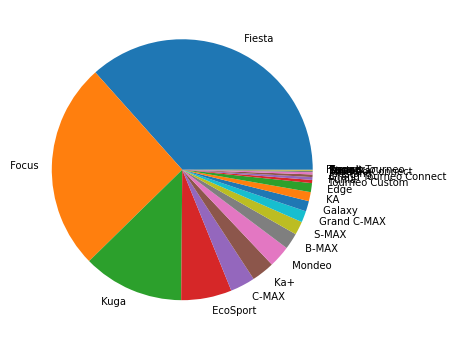

In [69]:
used_cars["model"].value_counts().plot.pie(figsize = (6,6), ylabel = "")

In [11]:
#Top 5 Most popular New Cars
new_cars["model"].value_counts()[0:5]

 Fiesta      109
 Focus        53
 Mondeo       49
 EcoSport     39
 Ka+          31
Name: model, dtype: int64

Fiesta <- subcompact
Focus <- compact
Mondeo <- medium-size hatchback
EcoSport <- SUV
Ka+ <- subcompact 

<AxesSubplot:>

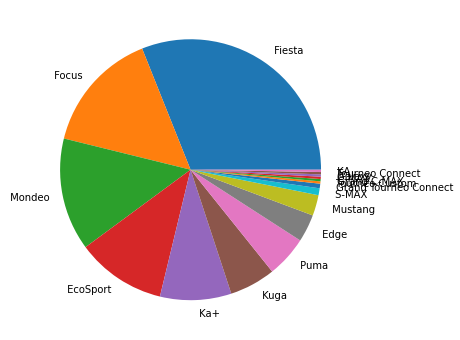

In [70]:
new_cars["model"].value_counts().plot.pie(figsize = (6,6), ylabel = "")

### Insight

Ford Fiesta and Focus are the most popular cars in both new and used Ford market
The type of the car (compact, subcompact, SUV, etc) does not seem to be significant

In [12]:
#Average values for New Cars
new_cars[["year", "price", "tax", "mpg", "engineSize"]].mean()

year           2019.245014
price         18772.356125
tax             145.598291
mpg              54.052422
engineSize        1.373219
dtype: float64

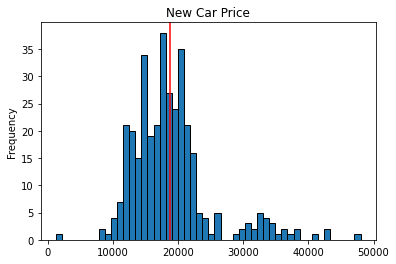

In [107]:
new_cars["price"].plot(kind = "hist", alpha = 1, title = "New Car Price", bins = 50, edgecolor = "black")
plt.axvline(x = new_cars["price"].mean(), color = "red")

In [67]:
#Average values for Used Cars
used_cars[["year", "price", "mileage", "tax", "mpg", "engineSize"]].mean()

year           2016.816623
price         12150.478653
mileage       23824.159362
tax             112.681219
mpg              57.984649
engineSize        1.350358
dtype: float64

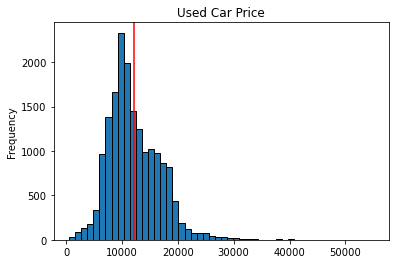

In [108]:
used_cars["price"].plot(kind = "hist", alpha = 1, title = "Used Car Price", bins = 50, edgecolor = "black")
plt.axvline(x = used_cars["price"].mean(), color = "red")

### Insight

On average, the prices of used ford cars are $6621.88 cheaper , the mpg is 3.93223 higher.

In [28]:
mean_used_sorted = used_cars.groupby("model").mean().sort_values(by = "price")
print(mean_used_sorted["price"][0:3])

model
 Streetka    1924.5000
 Fusion      2555.8125
 Escort      3000.0000
Name: price, dtype: float64


In [29]:
mean_new_sorted = new_cars.groupby("model").mean().sort_values(by = "price")
print(mean_new_sorted['price'][0:3])

model
 KA        10499.000000
 Ka+       11651.516129
 Fiesta    15280.532110
Name: price, dtype: float64


In [46]:
price_diff = mean_new_sorted["price"] - mean_used_sorted["price"]
diff = price_diff.dropna()
mean_diff = sum(diff) / len(diff)
print(mean_diff)

6138.907148784458


### Insight

Among the cars that were both sold used and new, the used cars on average cost $6138.91 less.

In [11]:
#Most sought after feature in New Cars
new_cars[["transmission", "fuelType"]].mode()

,transmission,fuelType
0,Manual,Petrol


In [12]:
#Most sought after feature in Used Cars
used_cars[["transmission", "fuelType"]].mode()

,transmission,fuelType
0,Manual,Petrol


<AxesSubplot:title={'center':'Transmission'}>

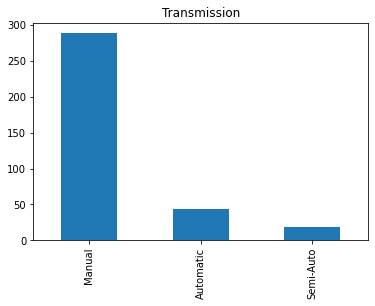

In [59]:
new_cars["transmission"].value_counts().plot(kind = "bar", title = "Transmission")

<AxesSubplot:title={'center':'Transmission'}>

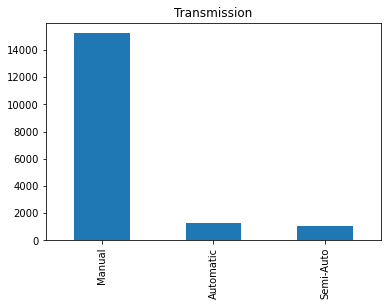

In [60]:
used_cars["transmission"].value_counts().plot(kind = "bar", title = "Transmission")

<AxesSubplot:title={'center':'fuelType'}>

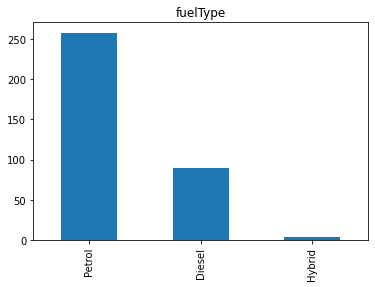

In [62]:
new_cars["fuelType"].value_counts().plot(kind = "bar", title = "fuelType")

<AxesSubplot:title={'center':'fuelType'}>

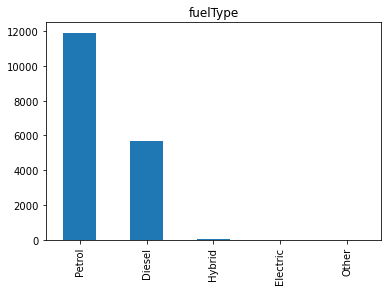

In [63]:
used_cars["fuelType"].value_counts().plot(kind = "bar", title = "fuelType")

### Insight

Regardless of the condition of the car, the most popular type of transmission was Manual and the most popular fuelType was Petrol.

In [73]:
new_cars["mpg"].mean()

54.05242165242166

In [72]:
used_cars["mpg"].mean()

57.984648574997564

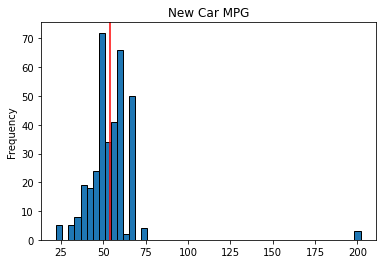

In [116]:
new_cars["mpg"].plot(kind = "hist", alpha = 1, title = "New Car MPG", edgecolor='black', bins = 50)
plt.axvline(x = new_cars["mpg"].mean(), color = "red")

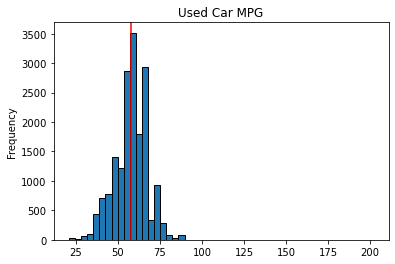

In [117]:
used_cars["mpg"].plot(kind = "hist", alpha = 1, title = "Used Car MPG", edgecolor='black', bins = 50)
plt.axvline(x = used_cars["mpg"].mean(), color = "red")

### Insight

The average mpg for new cars sold was around 54.0524 while the average mpg for used cars sold was around 57.9846, with a difference less than 4mpg. Therefore the cars' MPG is similar in used and new car markets

In [81]:
new_cars["engineSize"].mode()

0    1.0
dtype: float64

In [83]:
used_cars["engineSize"].mode()

0    1.0
dtype: float64

In [ ]:
new_cars["engineSize"].mean()

In [ ]:
used_cars["engineSize"].mean()

<AxesSubplot:title={'center':'New Car Engine Size'}>

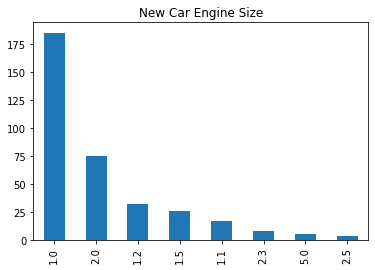

In [85]:
new_cars["engineSize"].value_counts().plot(kind = "bar", title = "New Car Engine Size")

<AxesSubplot:title={'center':'Used Car Engine Size'}>

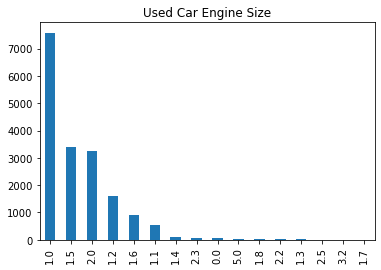

In [86]:
used_cars["engineSize"].value_counts().plot(kind = "bar", title = "Used Car Engine Size")

### Insight

For both used and new cars' engine size, the most popular size was 1, or in other words 1.0 litre.

Text(0.5, 1.0, 'Milage and Price in used cars')

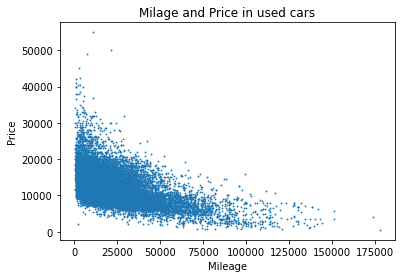

In [13]:
plt.scatter("mileage", "price", data = used_cars,s = 0.7)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Milage and Price in used cars")

Text(0.5, 1.0, 'The Change in Price of New cars')

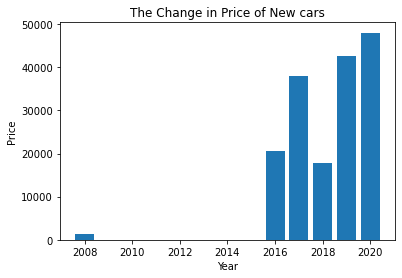

In [14]:
plt.bar("year", "price", data = new_cars)
plt.ylabel("Price")
plt.xlabel("Year")
plt.title("The Change in Price of New cars")

Text(0.5, 1.0, 'The Change in Price of Used cars')

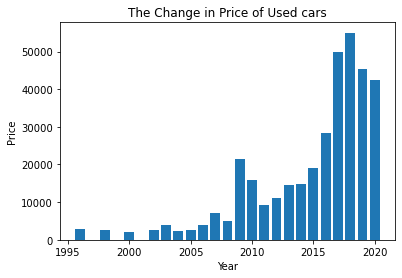

In [15]:
# Is there a correlation between the year of the car and the price?
plt.bar("year", "price", data = used_cars)
plt.ylabel("Price")
plt.xlabel("Year")
plt.title("The Change in Price of Used cars")

Text(0, 0.5, 'Mileage')

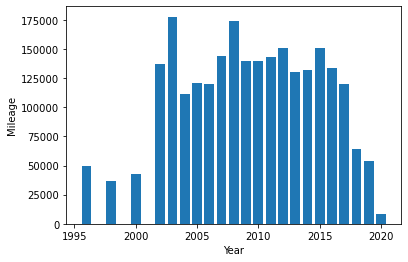

In [16]:
# Is there a correlation between the year of the car and mileage?
plt.bar("year", "mileage", data = used_cars)
plt.xlabel("Year")
plt.ylabel("Mileage")

# Potential insight
  # There seems to be no correlation between car and mileage, meaning that it was not necessarily true that older cars had higher mileage
  # Therefore there is a correlation between price and year?

Text(0, 0.5, 'mpg')

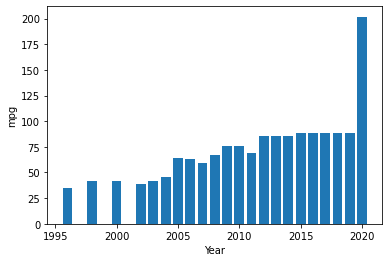

In [17]:
# Increased fuel efficiency?
plt.bar("year", "mpg", data = df)
plt.xlabel("Year")
plt.ylabel("mpg")